## Big Mart Dataset - EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#Importing the train and test dataset 
train_df = pd.read_csv('train_v9rqX0R.csv')
test_df  = pd.read_csv('test_AbJTz2l.csv')

In [3]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
## Checking the shape of the train and the test dataset
print('Shape of the train dataset :',train_df.shape)
print('Shape of the test dataset :',test_df.shape)

Shape of the train dataset : (8523, 12)
Shape of the test dataset : (5681, 11)


In [9]:
## Combining both the datasets together
train_df['source']='train'
test_df['source']='test'

In [13]:
dataset=pd.concat([train_df,test_df])

In [14]:
dataset.shape

(14204, 13)

In [15]:
dataset.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

## Identifying the features that have nan values in it.

In [16]:
dataset.isna().sum()>=1

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales             True
source                       False
dtype: bool

In [18]:
dataset[dataset.isna().any(axis=1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
8,FDH17,16.2,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,train
9,FDU28,19.2,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,train
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [19]:
features_with_nan = [features for features in dataset.columns if dataset[features].isna().sum()>=1]

In [20]:
features_with_nan

['Item_Weight', 'Outlet_Size', 'Item_Outlet_Sales']

In [21]:
for features in features_with_nan:
    print(features,"-", np.round(dataset[features].isna().mean()*100,3),'% missing values')

Item_Weight - 17.171 % missing values
Outlet_Size - 28.274 % missing values
Item_Outlet_Sales - 39.996 % missing values


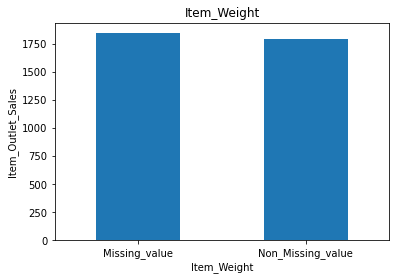

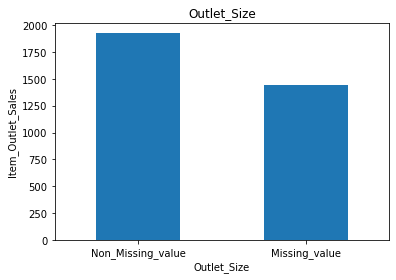

In [23]:
#Checking if the non null values contibute in predicting the sales wrt train_df
data = train_df.copy()
for features in features_with_nan:
    if features !='Item_Outlet_Sales':
        data[features]=np.where(data[features].isna(),'Missing_value','Non_Missing_value')
        data.groupby(features)['Item_Outlet_Sales'].median().sort_values(ascending=False).plot.bar(rot=0)
        plt.title(features)
        plt.ylabel('Item_Outlet_Sales')
        plt.show()

### Conclusion
1. The median sales wrt missing values in Item_Weight seems to be slightly higher than Non-Missing values.
2. The median sales wrt missing values in Outlet_Size seems to be lower than Non-Missing values.

## Split the Numerical & Categorical Variables in Train Dataset

In [24]:
print('Total Number of Features in Dataset :',len(dataset.columns))
Quantitative_Features = [features for features in dataset.columns if dataset[features].dtype != 'object']
Qualitative_Features = [features for features in dataset.columns if dataset[features].dtype == 'object']

print('No. of Quantitative/Numerical Features :', len(Quantitative_Features))
print('No. of Qualitative/Categorical Features :', len(Qualitative_Features))

Total Number of Features in Dataset : 13
No. of Quantitative/Numerical Features : 5
No. of Qualitative/Categorical Features : 8


In [25]:
print('Quantitative Features :\n',Quantitative_Features)
print('Qualitative Features :\n', Qualitative_Features)

Quantitative Features :
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
Qualitative Features :
 ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source']


## Identifying the Datetime features

In [26]:
temporal_features=[feature for feature in Quantitative_Features if 'Yr' in feature or 'Year' in feature]

In [27]:
temporal_features

['Outlet_Establishment_Year']

In [126]:
train_df['Outlet_Establishment_Year'].name in temporal_features

True

## Split the Numerical Variables to Continous and Discrete

In [30]:
discrete_features=[features for features in Quantitative_Features if len(dataset[features].unique())<=20 and dataset[features].name not in temporal_features]

In [31]:
discrete_features

[]

In [32]:
continous_features = [features for features in Quantitative_Features if dataset[features].name not in discrete_features and dataset[features].name not in temporal_features]

In [33]:
continous_features

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

## Checking the Distribution of Conitnous Variable & Looking if there is any outlier

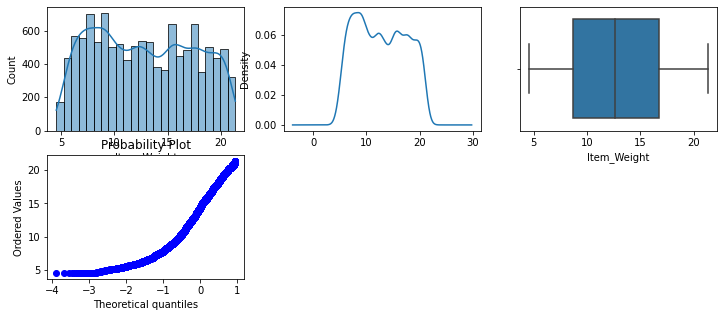

<Figure size 432x288 with 0 Axes>

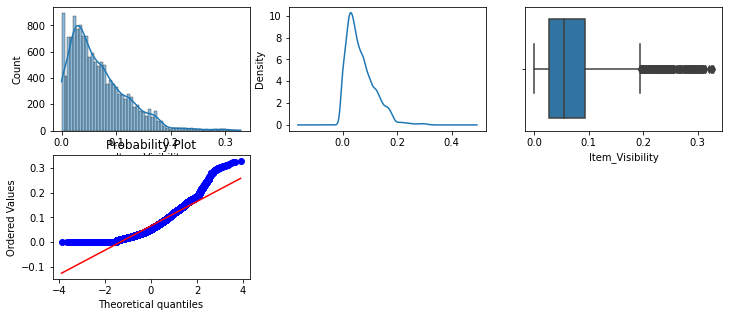

<Figure size 432x288 with 0 Axes>

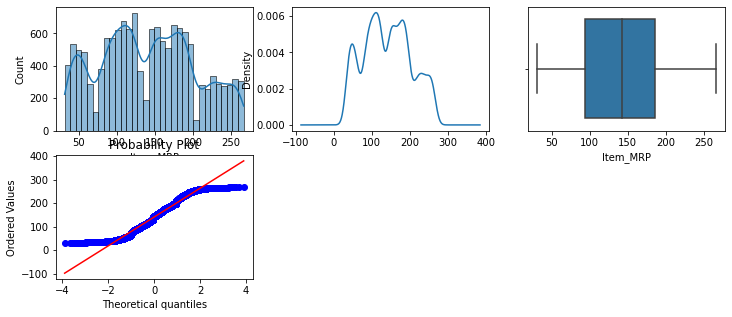

<Figure size 432x288 with 0 Axes>

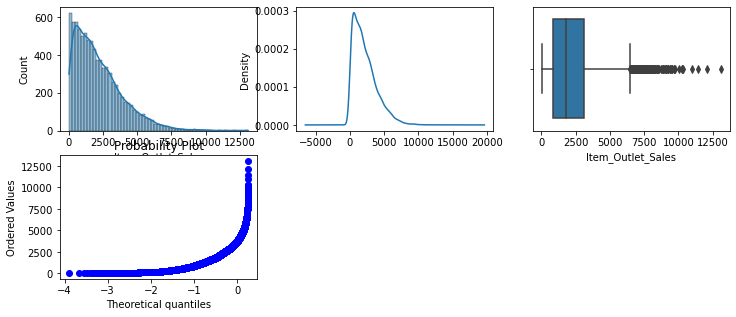

<Figure size 432x288 with 0 Axes>

In [35]:
for features in continous_features:
    plt.figure(figsize=(12,5))
    plt.subplot(2,3,1)
    sns.histplot(dataset[features],kde=True)
    plt.subplot(2,3,2)
    dataset[features].plot.kde()
    plt.subplot(2,3,3)
    sns.boxplot(x=features,data=dataset)
    plt.subplot(2,3,4)
    stats.probplot(dataset[features],plot=plt)
#     plt.subplot(2,3,4)
#     sns.histplot(np.log(train_df[features]),kde=True)
#     plt.subplot(2,3,5)
#     fitted_data, fitted_lambda = stats.boxcox(train_df[features])
#     sns.distplot(fitted_data)
#     plt.subplot(2,3,6)
#     stats.probplot(fitted_data,plot=plt)
#     # stats.probplot(train_df['Item_Outlet_Sales'],plot=plt)
    plt.show()
    plt.tight_layout()

## Outlier Analysis - Item_Visibility

In [36]:
##Outliers are seen in the Item_Visiblity column
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [45]:
dataset[dataset['Item_Visibility']>0.328391]
q1=np.quantile(a=dataset['Item_Visibility'],q=0.25)
q2=np.quantile(a=dataset['Item_Visibility'],q=0.50)
q3=np.quantile(a=dataset['Item_Visibility'],q=0.75)

print(f'The Q1/25th percentile value is {q1}. \nThe Q2/50th percentile value is {q2}. \nThe Q3/75th percentile is {q3}')
IQR = q3-q1
print(f'The IQR is {IQR}')

lower_bound = q1-(1.5*IQR)
upper_bound = q3+(1.5*IQR)
print(f'The lower bound is {lower_bound}, upper bound is {upper_bound}')

The Q1/25th percentile value is 0.0270356825. 
The Q2/50th percentile value is 0.05402053650000001. 
The Q3/75th percentile is 0.0940372535
The IQR is 0.067001571
The lower bound is -0.073466674, upper bound is 0.19453961


In [46]:
## Eventhough as per the calculation we get a lower_bound value as -0.073466674, the min value in dataset is 0.00000
## Hence replacing the value 
lower_bound = 0.00000

In [51]:
##There are no records lesser than lower bound, all the 261 records are higher than upper bound
Item_Visibility_outliers=dataset[(dataset['Item_Visibility'] < lower_bound) | (dataset['Item_Visibility'] > upper_bound)]

In [57]:
print(f'No.of outliers present in the Item_Visiblity field : {len(Item_Visibility_outliers)}')
print(f'% of Outliers present in Item_Visiblity :',len(Item_Visibility_outliers)/len(dataset)*100)

No.of outliers present in the Item_Visiblity field : 261
% of Outliers present in Item_Visiblity : 1.8375105604055197


In [61]:
print('No. of outliers present wrt train/test')
Item_Visibility_outliers['source'].value_counts()

No. of outliers present wrt train/test


train    148
test     113
Name: source, dtype: int64

In [119]:
Item_Visibility_outliers['Item_Visibility'].describe()

count    261.000000
mean       0.243488
std        0.035387
min        0.194577
25%        0.214125
50%        0.236434
75%        0.274405
max        0.328391
Name: Item_Visibility, dtype: float64

In [95]:
dataset['Visibility_outlier']=np.where((dataset['Item_Visibility'] < lower_bound) | (dataset['Item_Visibility'] > upper_bound),'Outlier','Not_Outlier')

Text(0, 0.5, 'Median Outlet Sales')

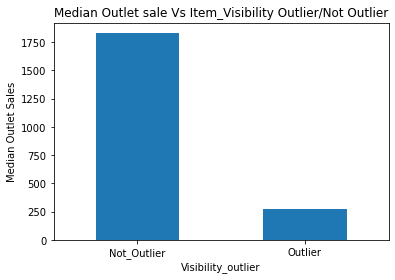

In [99]:
plt.title('Median Outlet sale Vs Item_Visibility Outlier/Not Outlier')
dataset.groupby('Visibility_outlier')['Item_Outlet_Sales'].median().sort_values(ascending=False).plot.bar(rot=0)
plt.ylabel('Median Outlet Sales')

In [87]:
Item_Visibility_outliers['Outlet_Establishment_Year'].unique()
#The years where these outliers are seen

array([1985, 1998], dtype=int64)

In [102]:
Item_Visibility_outliers['Outlet_Type'].unique()
## All the outliers have the outlet type as grocery store.

array(['Grocery Store'], dtype=object)

In [122]:
Item_Visibility_outliers['Outlet_Size'].unique()
## All the outliers have the outlet type as grocery store.

array(['Small', nan], dtype=object)

In [124]:
dataset[dataset['Outlet_Type']=='Grocery Store']['Outlet_Size'].unique()

array([nan, 'Small'], dtype=object)

In [105]:
dataset[dataset['Outlet_Type']=='Grocery Store']['Outlet_Establishment_Year'].unique()
## Grocery stores are available only in these two years (i.e.) 1985 & 1998 in the whole dataset 

array([1998, 1985], dtype=int64)

In [106]:
len(dataset[dataset['Outlet_Type']=='Grocery Store'])

1805

<AxesSubplot:xlabel='Item_Visibility', ylabel='Count'>

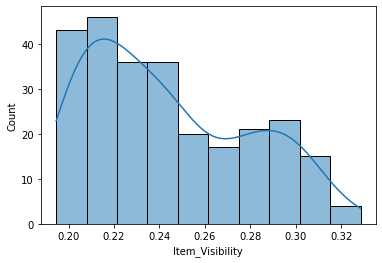

In [118]:
sns.histplot(dataset[(dataset['Outlet_Type']=='Grocery Store') & (dataset['Visibility_outlier']=='Outlier')]['Item_Visibility'],kde=True)

In [108]:
dataset[dataset['Outlet_Type']=='Grocery Store']['Item_Visibility'].describe()

count    1805.000000
mean        0.104596
std         0.075478
min         0.000000
25%         0.045309
50%         0.087967
75%         0.149423
max         0.328391
Name: Item_Visibility, dtype: float64

### Conclusion on Outliers

1. There are a total of 261 records which contribute to outliers
2. That is 1.8% of the total data we have 
3. The outlier records that we see have the outlet type as Grocery store & their Establishment Years are 1985 and 1998
4. The minimum value in the outlier is 0.194 & maximum value is 0.32

### Analysing the records that have zero visiblity

In [68]:
print(f'No. of records having 0.000 Item_visibility are :',len(dataset[dataset['Item_Visibility'] <= 0.0000]))

No. of records having 0.000 Item_visibility are : 879


In [120]:
zero_visibility_data = dataset[dataset['Item_Visibility'] <= 0.0000]

In [121]:
zero_visibility_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Visibility_outlier
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,Not_Outlier
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Not_Outlier
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train,Not_Outlier
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,train,Not_Outlier
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064,train,Not_Outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5643,FDQ19,NaN,Regular,0.0,Fruits and Vegetables,244.3512,OUT019,1985,Small,Tier 1,Grocery Store,NaN,test,Not_Outlier
5648,FDK26,NaN,Regular,0.0,Canned,187.5240,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test,Not_Outlier
5654,FDQ57,7.275,Low Fat,0.0,Snack Foods,144.5760,OUT013,1987,High,Tier 3,Supermarket Type1,NaN,test,Not_Outlier
5661,DRG37,NaN,Low Fat,0.0,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test,Not_Outlier


## Checking the relationship between independent continous variables against the dependent variable

### Scatter Plot to check the relationship

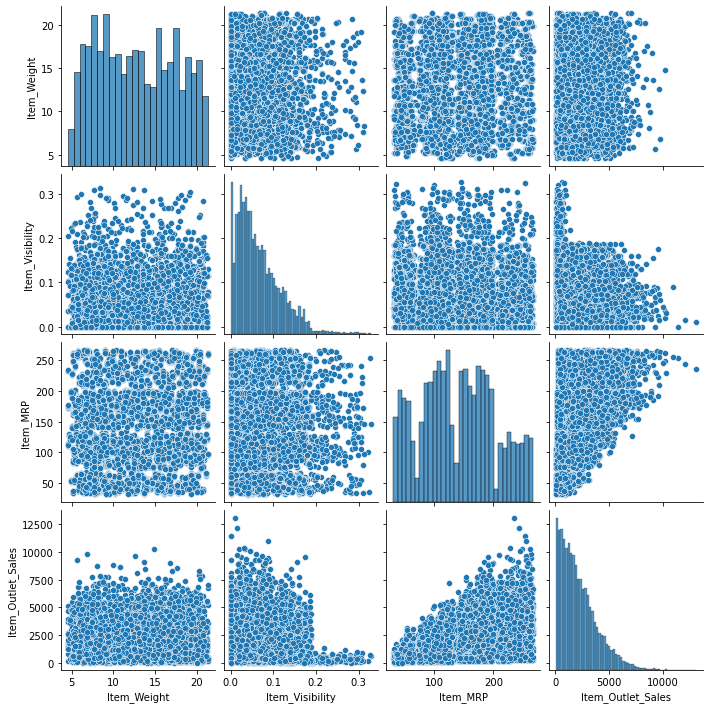

In [125]:
sns.pairplot(dataset[continous_features])

### Correlation Matrix

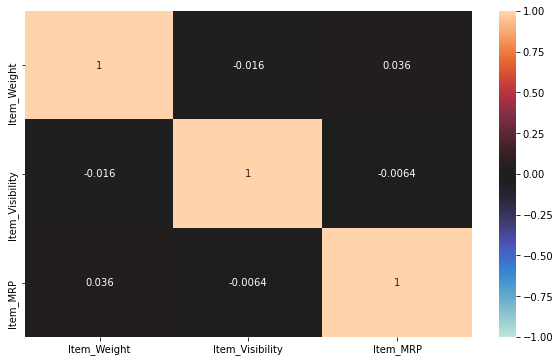

In [128]:
plt.figure(figsize=(10,6))
corr = dataset[[features for features in continous_features if features!='Item_Outlet_Sales']].corr()

ax = sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=True)

## Conclusion - Numerical Features
1. None of the continous variables follows a normal distribution
2. Outliers are seen in the Item_Visibility and Item_Outlet_Sales(Dependent variable)
3. The Item_Visibility and Item_Outlet_Sales seems to follow the same kind of distribution
4. Item_Weight and Item_MRP does not have any outliers.
5. W.r.t correlation, it seems that there exist some amount of correlation between Item_MRP and Item_Outlet_sales. Apart from there is not much of evidence for correlation between any of the independent variables.
6. W.r.t item visibility there is no major relationship seen on records that have 0.0000 visibility against other variables in the dataset.

## Relationship between Temporal variable- Outlet Establishment Year & Sales Price

In [129]:
dataset['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [130]:
print('The different Establishment Years in the dataset :\n',np.sort(dataset[temporal_features[0]].unique()))

The different Establishment Years in the dataset :
 [1985 1987 1997 1998 1999 2002 2004 2007 2009]


In [132]:
dataset.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].aggregate(count_of_data = 'count',
                                                                             count_percent = lambda x : (len(x)/len(dataset))*100,
                                                                             mean_sales='mean',
                                                                             median_sales='median')
#The below presentation is showing the values only wrt train data because in test we dont have outlet_sales

,count_of_data,count_percent,mean_sales,median_sales
Outlet_Establishment_Year,,,,
1985,1463,17.171219,2483.677474,1845.5976
1987,932,10.933540,2298.995256,2050.6640
1997,930,10.912419,2277.844267,1945.8005
1998,555,6.512250,339.351662,250.3408
1999,930,10.912419,2348.354635,1966.1074
2002,929,10.898338,2192.384798,1834.9448
2004,930,10.912419,2438.841866,2109.2544
2007,926,10.863137,2340.675263,2005.0567
2009,928,10.884258,1995.498739,1655.1788


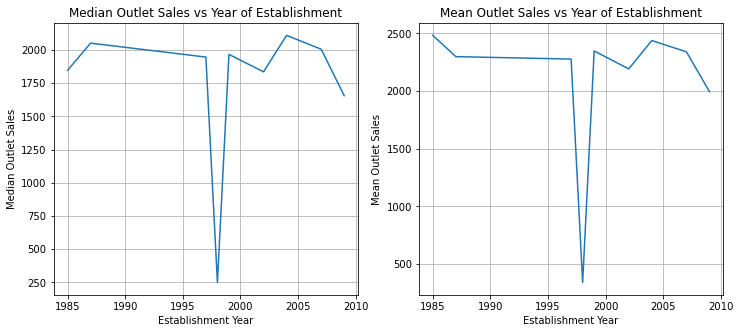

In [133]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
train_df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].median().plot()
plt.xlabel('Establishment Year')
plt.ylabel('Median Outlet Sales')
plt.title('Median Outlet Sales vs Year of Establishment')
plt.grid()
plt.subplot(1,2,2)
train_df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot()
plt.xlabel('Establishment Year')
plt.ylabel('Mean Outlet Sales')
plt.title('Mean Outlet Sales vs Year of Establishment')
plt.grid()

## Conclusion 
1. The Dataset contains information for 9 differenet years.
2. The Avg sales for each year has been always greater than Rs.2000
3. But in the year 1998, the sales has drastically reduced to an Avg of about Rs.339. On an Avg. there are about 10% of records present overall with respect to the population for each year but w.r.t year 1998 it is only 6.5%. That could also be the reason why the sales is low for this year.
4. Check if there exist any relationship between temporal feature and other categorical features

## Listing the number of categories in each categorical variable

In [134]:
categorical_features=[features for features in dataset[Qualitative_Features]]

In [135]:
for feature in categorical_features:
    print(f'The feature name is {feature} and number of categories are : {len(dataset[feature].unique())}')

The feature name is Item_Identifier and number of categories are : 1559
The feature name is Item_Fat_Content and number of categories are : 5
The feature name is Item_Type and number of categories are : 16
The feature name is Outlet_Identifier and number of categories are : 10
The feature name is Outlet_Size and number of categories are : 4
The feature name is Outlet_Location_Type and number of categories are : 3
The feature name is Outlet_Type and number of categories are : 4
The feature name is source and number of categories are : 2


In [136]:
categorical_features

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'source']

In [148]:
categorical_features.remove('Item_Identifier')

In [149]:
categorical_features

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [151]:
for items in categorical_features:
    if items!= 'Item_Identifier':
        print(f'Value count for feature - {items}')
        print(dataset[items].value_counts())
        print('\n')

Value count for feature - Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64


Value count for feature - Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64


Value count for feature - Outlet_Identifier
OUT027    1559
OUT013    1553
OUT035    1550
OUT046    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64


Value count for feature - Outlet_Size
Medium    4655
Sma

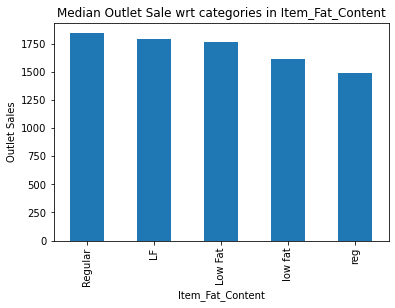

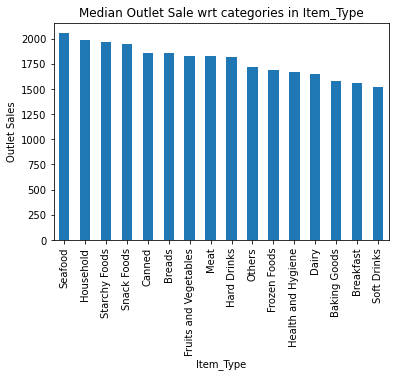

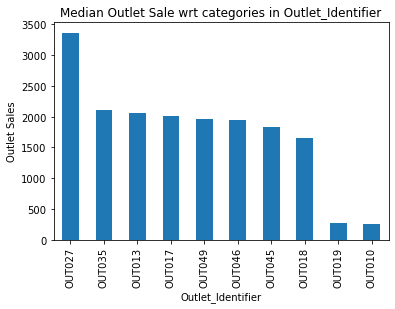

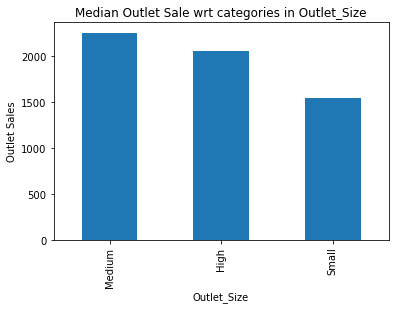

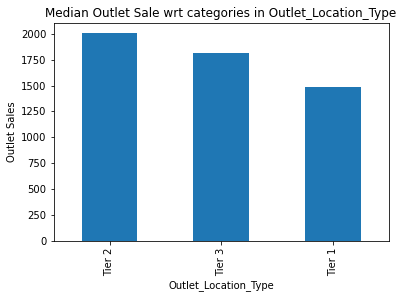

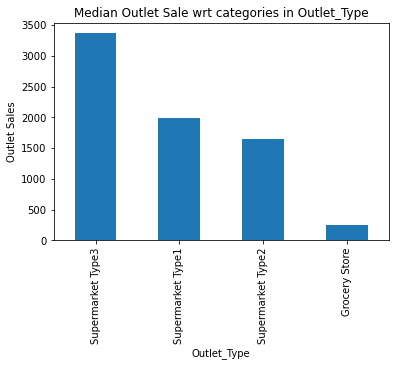

In [152]:
data = train_df.copy()
for feature in categorical_features:
    data.groupby(feature)['Item_Outlet_Sales'].median().sort_values(ascending=False).plot.bar()
    plt.title(f'Median Outlet Sale wrt categories in {feature}')
    plt.ylabel('Outlet Sales')
    plt.show()

<AxesSubplot:xlabel='Outlet_Type,Outlet_Size'>

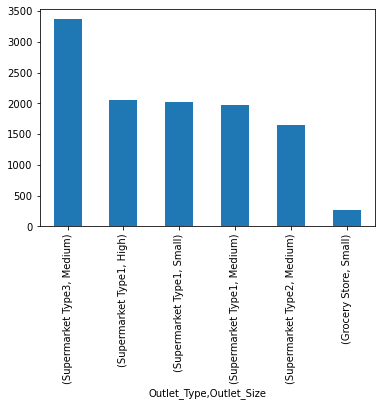

In [154]:
data.groupby(['Outlet_Type','Outlet_Size'])['Item_Outlet_Sales'].median().sort_values(ascending=False).plot.bar()

In [157]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [160]:
#Replacing 'Low Fat' & 'Regular'
data['Item_Fat_Content']=data['Item_Fat_Content'].map({'Low Fat':'Low Fat','low fat':'Low Fat','LF':'Low Fat','Regular':'Regular','reg':'Regular'})

In [161]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

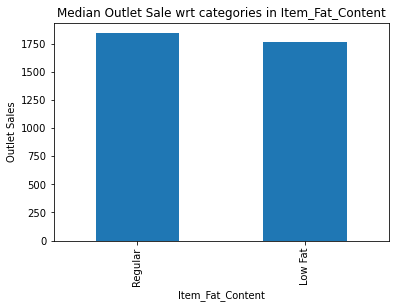

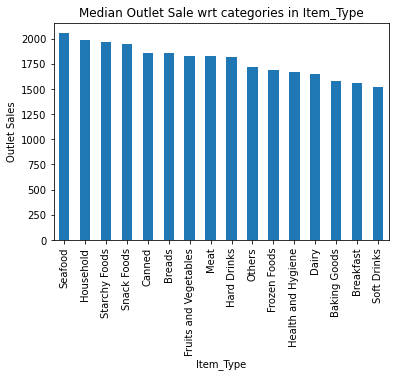

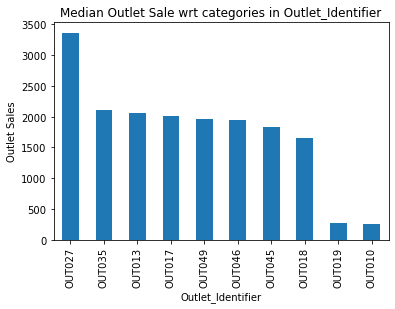

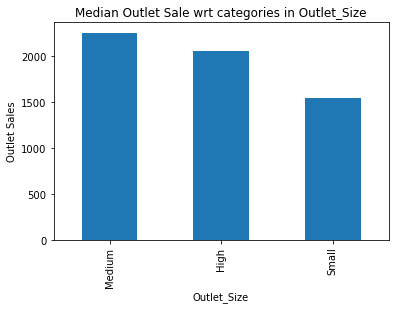

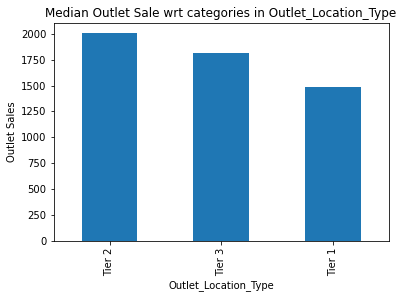

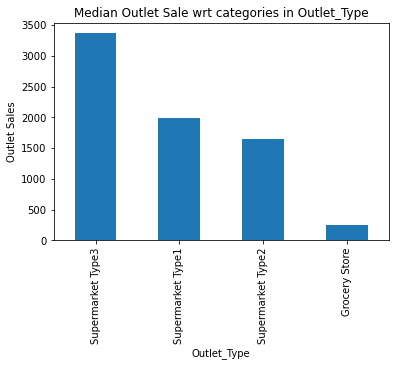

In [163]:
#Plotting the bar plot again
# data = train_df.copy()
for feature in categorical_features:
    data.groupby(feature)['Item_Outlet_Sales'].median().sort_values(ascending=False).plot.bar()
    plt.title(f'Median Outlet Sale wrt categories in {feature}')
    plt.ylabel('Outlet Sales')
    plt.show()

In [178]:
data['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [189]:
data['Item_Identifier'].str.split()[0][0][0:2]

'FD'

In [195]:
data['Item_Identifier'][0][0:2]

'FD'

In [207]:
data['Item_Identifier']=data['Item_Identifier'].apply(lambda x:x.split()[0][0:2])

In [208]:
data['Item_Identifier'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

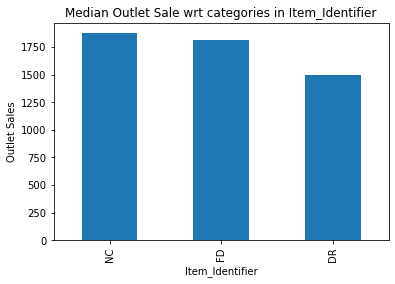

In [209]:
data.groupby('Item_Identifier')['Item_Outlet_Sales'].median().sort_values(ascending=False).plot.bar()
plt.title(f'Median Outlet Sale wrt categories in Item_Identifier')
plt.ylabel('Outlet Sales')
plt.show()

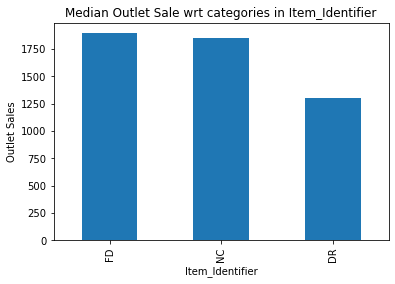

In [249]:
data[data['Outlet_Establishment_Year']==1985].groupby('Item_Identifier')['Item_Outlet_Sales'].median().sort_values(ascending=False).plot.bar()
plt.title(f'Median Outlet Sale wrt categories in Item_Identifier')
plt.ylabel('Outlet Sales')
plt.show()

In [212]:
data['Item_Identifier'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [229]:
data.groupby(['Item_Identifier','Item_Type']).aggregate({'Item_Outlet_Sales':['mean','median'],
                                                         'Item_MRP':['mean','median']
                                                         })

Item_Outlet_Sales             \
                                                   mean     median   
Item_Identifier Item_Type                                            
DR              Dairy                       1751.272763  1276.3386   
                Hard Drinks                 2139.221622  1816.6353   
                Soft Drinks                 2006.511735  1518.0240   
FD              Baking Goods                1952.971207  1577.9460   
                Breads                      2204.132226  1860.2452   
                Breakfast                   2111.808651  1554.6430   
                Canned                      2225.194904  1860.2452   
                Dairy                       2356.855838  1868.5677   
                Frozen Foods                2132.867744  1687.1372   
                Fruits and Vegetables       2289.009592  1830.9500   
                Meat                        2158.977911  1829.6184   
                Seafood                     2326.065928  2055.3246   
                Snack Foods                 2277.321739  1944.1360   
                Starchy Foods               2374.332773  1968.1048   
NC              Health and Hygiene          2010.000265  1669.4935   
                Household                   2258.784300  1981.4208   
                Others                      1926.139702  1713.7692   

                                         Item_MRP            
                                             mean    median  
Item_Identifier Item_Type                                    
DR              Dairy                  120.009869   96.7226  
                Hard Drinks            137.077928  144.9444  
                Soft Drinks            131.492506  144.0102  
FD              Baking Goods           126.380766  112.3544  
                Breads                 140.952669  129.1310  
                Breakfast              141.788151  155.3630  
                Canned                 139.763832  140.1496  
                Dairy                  155.858077  152.6669  
                Frozen Foods           138.503366  128.6494  
                Fruits and Vegetables  144.581235  145.5444  
                Meat                   139.882032  146.5734  
                Seafood                141.841719  158.5604  
                Snack Foods            146.194934  146.6734  
                Starchy Foods          147.838023  166.9342  
NC              Health and Hygiene     130.818921  128.0349  
                Household              149.424753  153.3182  
                Others                 132.851430  130.9284

## Analysing relationship between Establishment_Year, Item_Weight and Item_type

In [230]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

                          Item_Weight       
                                 mean median
Outlet_Establishment_Year                   
1985                              NaN    NaN
1987                        13.006148  12.85
1997                        12.866801  12.60
1998                        12.913153  12.60
1999                        12.917446  12.65
2002                        12.649989  12.50
2004                        12.829349  12.55
2007                        12.826668  12.60
2009                        12.873346  12.60


<Figure size 360x720 with 0 Axes>

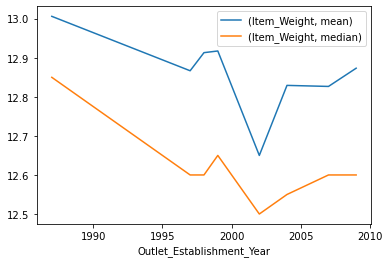

In [254]:
print(train_df.groupby(['Outlet_Establishment_Year']).aggregate({'Item_Weight':['mean','median']}))
plt.figure(figsize=(5,10))
train_df.groupby(['Outlet_Establishment_Year']).aggregate({'Item_Weight':['mean','median']}).plot()
plt.legend(loc='upper right')

In [250]:
#Check what all Item_type was available in the year 1985
print('No. of item_types available in the whole dataset:',len(train_df['Item_Type'].unique()))
print('List of item_types available in the year 1985 :\n',train_df[train_df['Outlet_Establishment_Year']==1985]['Item_Type'].unique())
print('\n')
print('No. of item_types available the year 1985 :',len(train_df[train_df['Outlet_Establishment_Year']==1985]['Item_Type'].unique()))

No. of item_types available in the whole dataset: 16
List of item_types available in the year 1985 :
 ['Snack Foods' 'Hard Drinks' 'Baking Goods' 'Canned'
 'Fruits and Vegetables' 'Dairy' 'Frozen Foods' 'Household' 'Breakfast'
 'Soft Drinks' 'Meat' 'Health and Hygiene' 'Starchy Foods' 'Others'
 'Seafood' 'Breads']


No. of item_types available the year 1985 : 16


In [276]:
train_df.groupby(['Item_Type']).aggregate({'Item_Weight':['mean','median']})

Item_Weight        
                             mean  median
Item_Type                                
Baking Goods            12.277108  11.650
Breads                  11.346936  10.600
Breakfast               12.768202  10.695
Canned                  12.305705  12.150
Dairy                   13.426069  13.350
Frozen Foods            12.867061  12.850
Fruits and Vegetables   13.224769  13.100
Hard Drinks             11.400328  10.100
Health and Hygiene      13.142314  12.150
Household               13.384736  13.150
Meat                    12.817344  12.350
Others                  13.853285  14.500
Seafood                 12.552843  11.650
Snack Foods             12.987880  13.150
Soft Drinks             11.847460  11.800
Starchy Foods           13.690731  13.175

In [278]:
pd.set_option('display.max_rows', 100)
train_df.groupby(['Outlet_Establishment_Year','Item_Type']).aggregate({'Item_Weight':['mean','median']})

Item_Weight        
                                               mean  median
Outlet_Establishment_Year Item_Type                        
1985                      Baking Goods          NaN     NaN
                          Breads                NaN     NaN
                          Breakfast             NaN     NaN
                          Canned                NaN     NaN
                          Dairy                 NaN     NaN
...                                             ...     ...
2009                      Others          13.061750  12.950
                          Seafood         13.779286  17.350
                          Snack Foods     12.927235  12.575
                          Soft Drinks     11.494891  11.700
                          Starchy Foods   14.587059  12.850

[144 rows x 2 columns]

<Figure size 864x216 with 0 Axes>

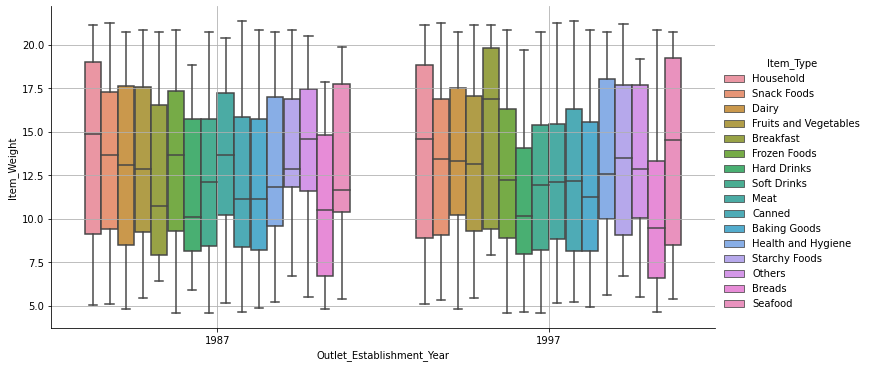

In [271]:
plt.figure(figsize=(12,3))
sns.catplot(data=train_df[train_df['Outlet_Establishment_Year'].isin([1987,1997])],
            x='Outlet_Establishment_Year',
            y='Item_Weight',
            hue='Item_Type',
            kind='box',
            height=5,aspect=2)
plt.grid()

<Figure size 864x216 with 0 Axes>

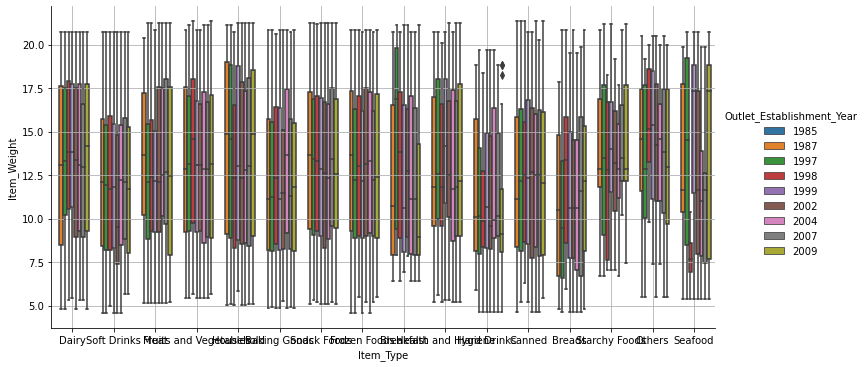

In [279]:
plt.figure(figsize=(12,3))
sns.catplot(data=train_df,
            x='Item_Type',
            y='Item_Weight',
            hue='Outlet_Establishment_Year',
            kind='box',
            height=5,aspect=2)
plt.grid()